In [11]:
# Download dataset

!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2024-05-13 07:50:23--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.62.24.187, 2600:1408:c400:168a::317f, 2600:1408:c400:1680::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.62.24.187|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M  82.3MB/s    in 11s     

2024-05-13 07:50:34 (72.3 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



In [12]:
!unzip kagglecatsanddogs_5340.zip


Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  

Dataset Information
The training archive contains 25,000 images of dogs and cats. Train your algorithm on these files and predict the labels

(1 = dog, 0 = cat).

In [13]:
#import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import tqdm
import random
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')

In [14]:
##create df for input and output

In [15]:
input_path = []
label = []

for class_name in os.listdir("PetImages"):
    for path in os.listdir("PetImages/"+class_name):
        if class_name == 'Cat':
            label.append(0)
        else:
            label.append(1)
        input_path.append(os.path.join("PetImages", class_name, path))
print(input_path[0], label[0])
print(input_path[1], label[1])
print(input_path[2], label[2])
print(input_path[5], label[5])
print(input_path[100], label[100])

PetImages/Cat/9882.jpg 0
PetImages/Cat/4313.jpg 0
PetImages/Cat/1128.jpg 0
PetImages/Cat/3118.jpg 0
PetImages/Cat/3415.jpg 0


In [16]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()



images  label
0  PetImages/Cat/10114.jpg      0
1  PetImages/Dog/11316.jpg      1
2   PetImages/Dog/1107.jpg      1
3   PetImages/Dog/9452.jpg      1
4   PetImages/Cat/1607.jpg      0

In [17]:

for i in df['images']:
    if '.jpg' not in i:
        print(i)

PetImages/Cat/Thumbs.db
PetImages/Dog/Thumbs.db


In [18]:
df = df[df['images']!='PetImages/Cat/Thumbs.db']
df = df[df['images']!='PetImages/Cat/Thumbs.db']

In [19]:
from PIL import Image

# Assuming df is your DataFrame containing image paths or data
error_images = []

for image_path in df['images']:
    try:
        with Image.open(image_path) as img:
            # Do something with the image, if needed
            pass
    except Exception as e:
        # Append the image path to the list of error images
        error_images.append(image_path)
        # Optionally, you can print or log the error for debugging
        print(f"Error processing image '{image_path}': {e}")

# Now error_images will contain the paths of images that caused errors during processing




Error processing image 'PetImages/Dog/Thumbs.db': cannot identify image file 'PetImages/Dog/Thumbs.db'
Error processing image 'PetImages/Cat/666.jpg': cannot identify image file 'PetImages/Cat/666.jpg'
Error processing image 'PetImages/Dog/11702.jpg': cannot identify image file 'PetImages/Dog/11702.jpg'


In [20]:
# delete db files
df = df[df['images'] != 'PetImages/Dog/Thumbs.db']
df = df[df['images'] != 'PetImages/Cat/Thumbs.db']
df = df[df['images'] != 'PetImages/Cat/666.jpg']
df = df[df['images'] != 'PetImages/Dog/11702.jpg']
len(df)

24998

In [21]:
for i in df['images']:
    if '.jpg' not in i:
        print(i)

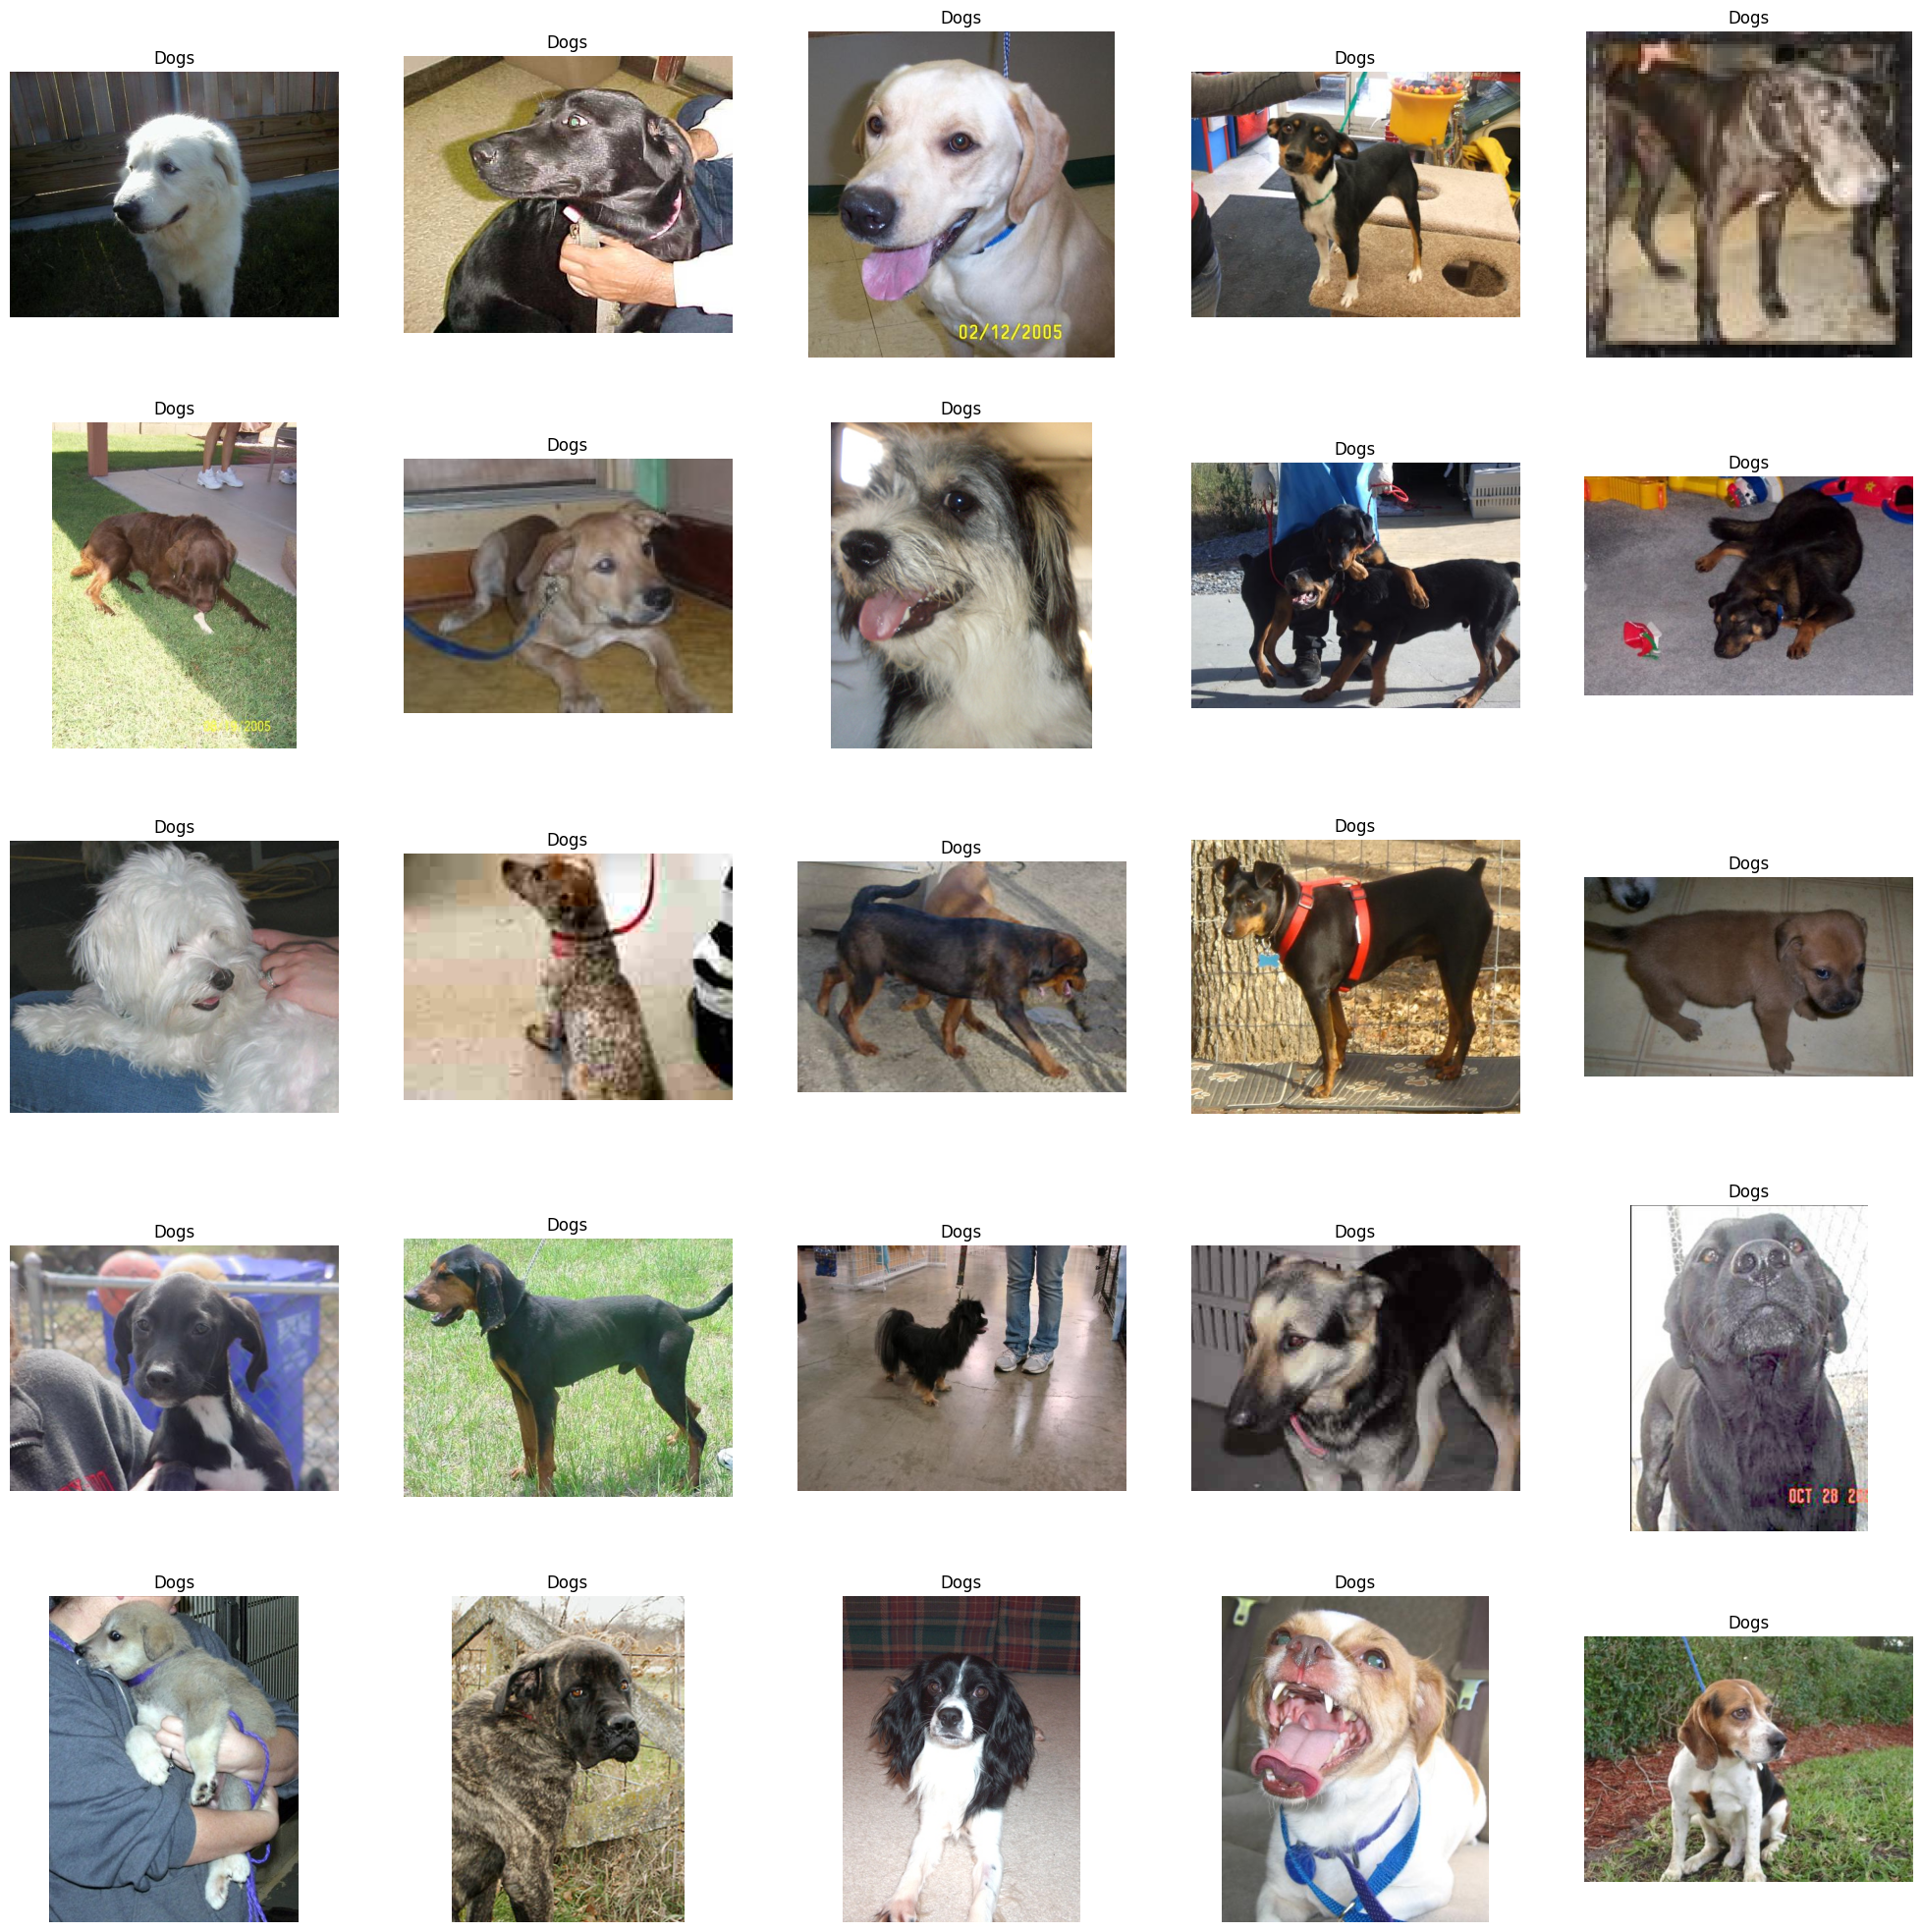

In [22]:
# to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Dogs')
    plt.axis('off')

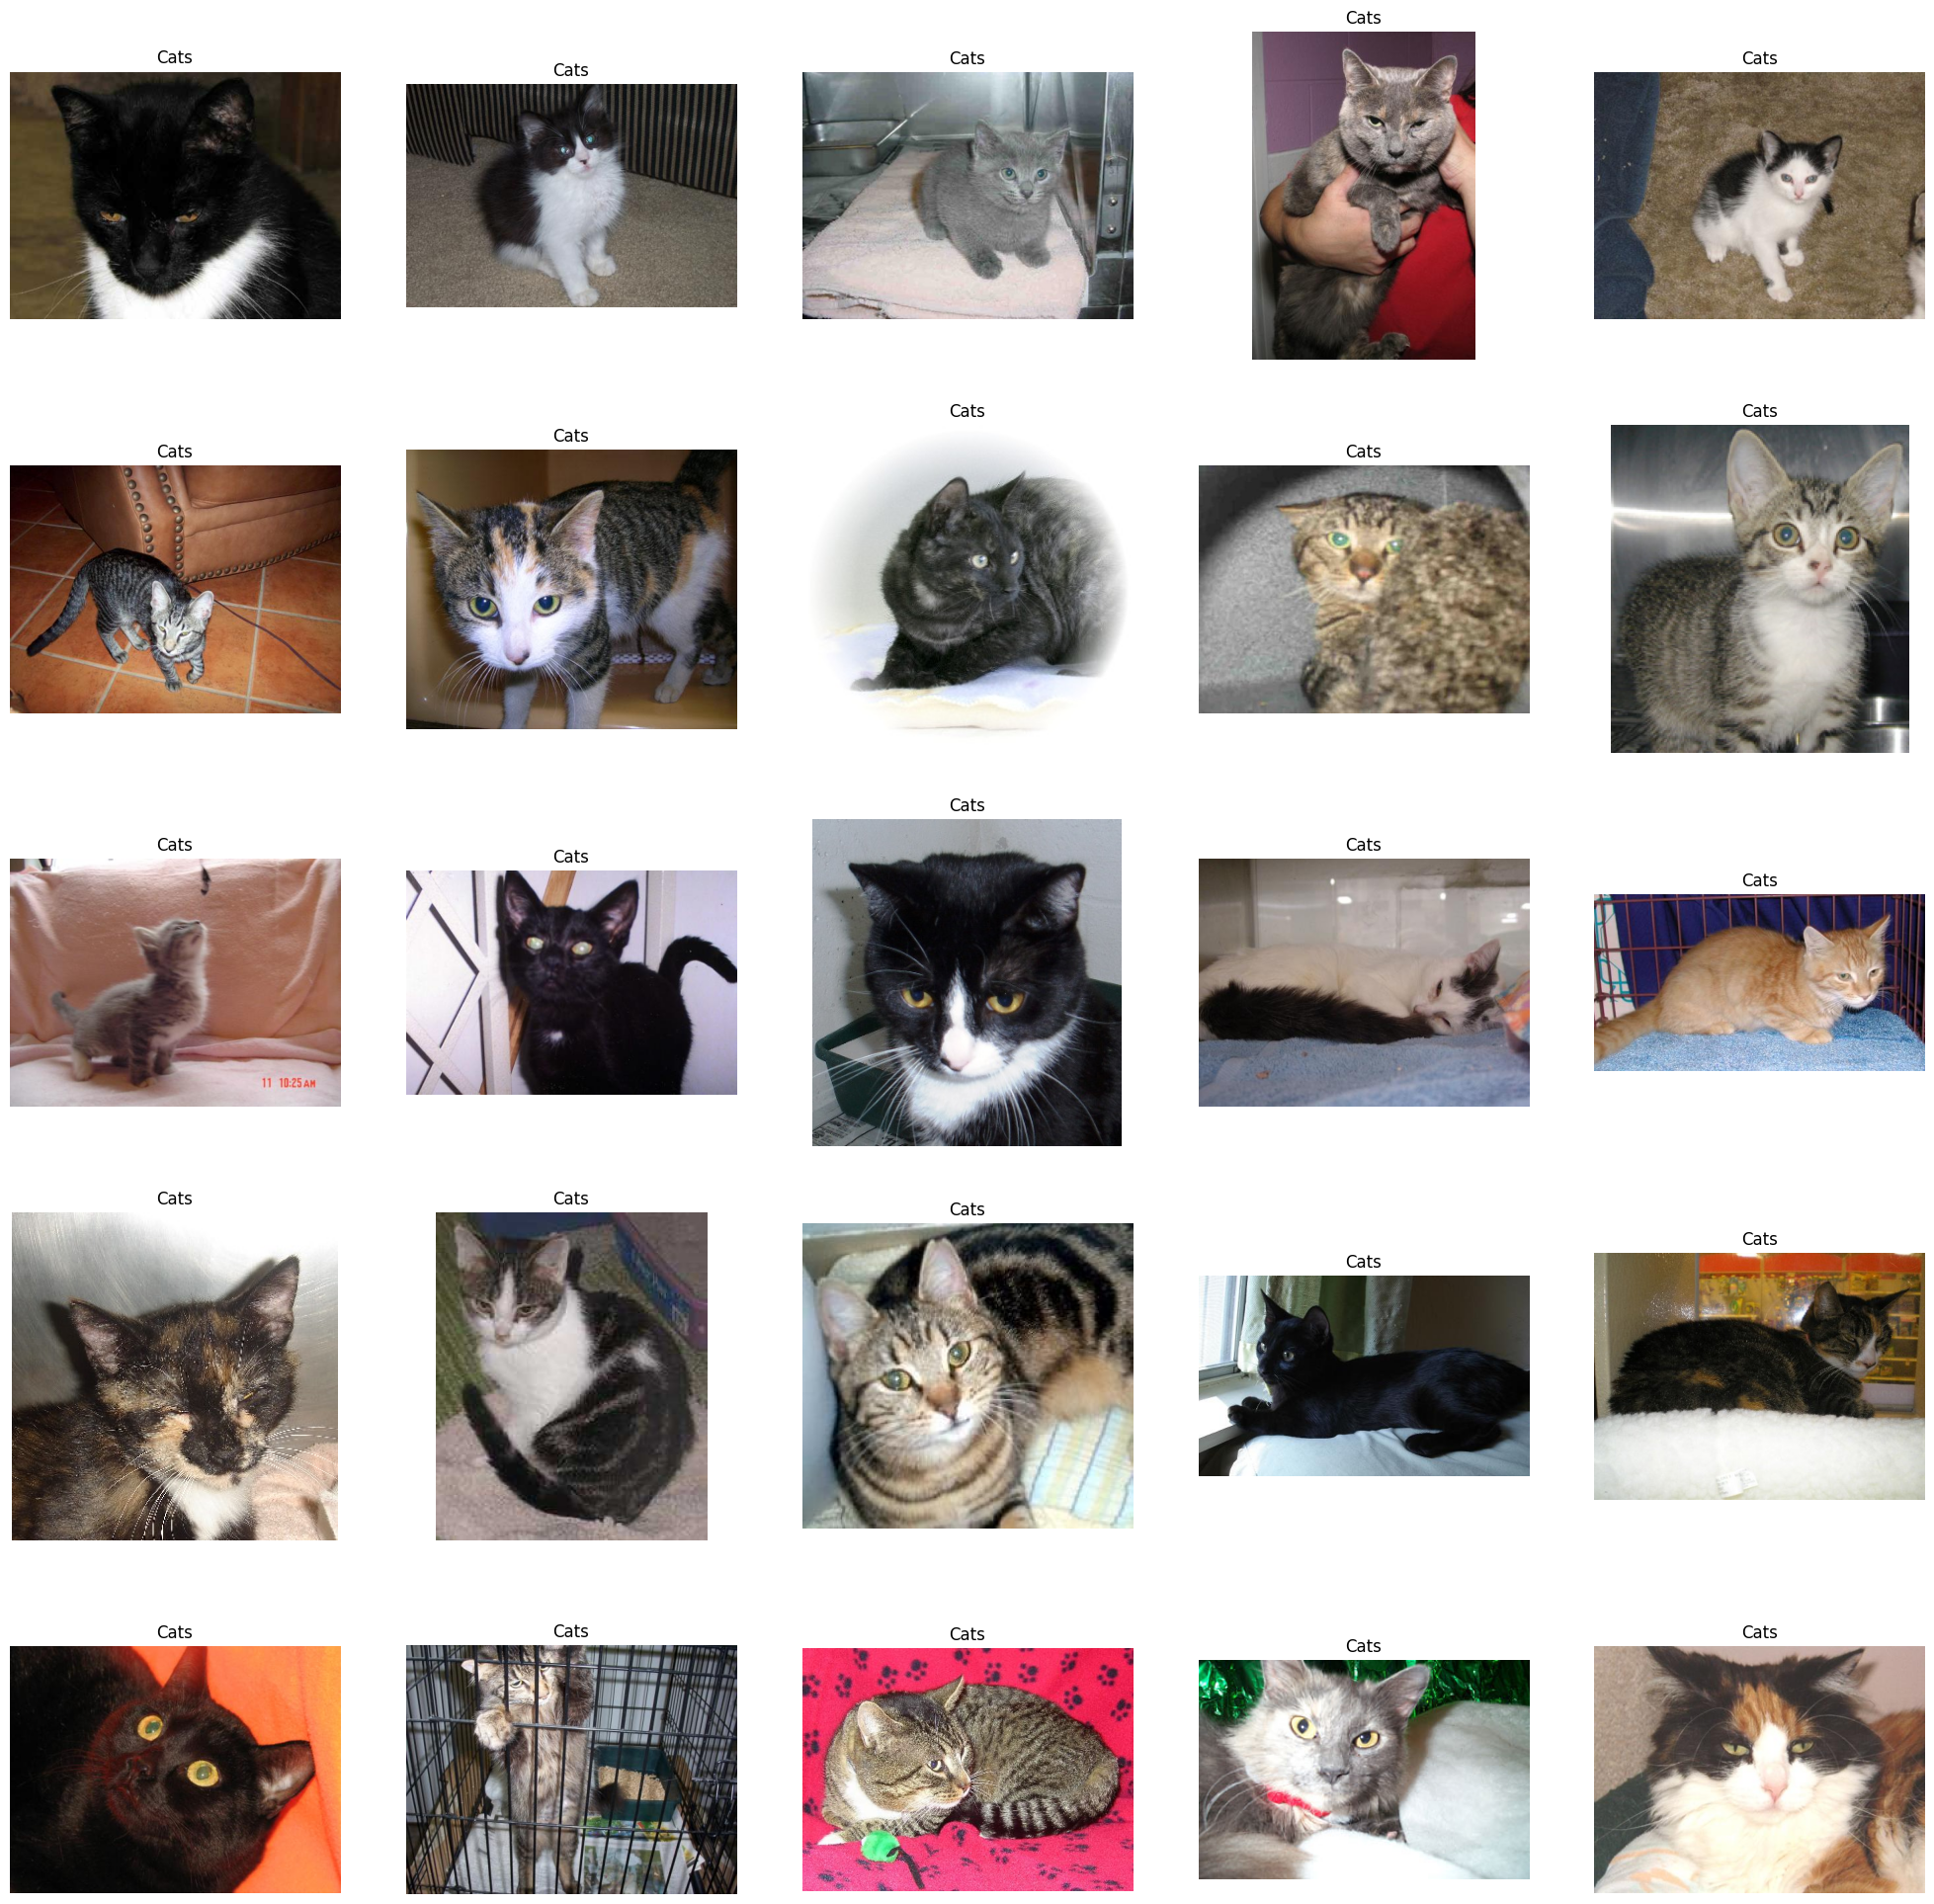

In [23]:
# to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==0]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Cats')
    plt.axis('off')

In [24]:
# import seaborn as sns
# sns.countplot(df['label'])

In [25]:
#convert labels into string
df['label'] = df['label'].astype('str')

df.head()


images label
0  PetImages/Cat/10114.jpg     0
1  PetImages/Dog/11316.jpg     1
2   PetImages/Dog/1107.jpg     1
3   PetImages/Dog/9452.jpg     1
4   PetImages/Cat/1607.jpg     0

In [26]:
# input split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [27]:
##image processing
#agumentation

from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255,  # normalization of images
    rotation_range = 40, # augmention of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

#train generator
train_iterator = train_generator.flow_from_dataframe(
    train,
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test,
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [28]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
                    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
                    MaxPool2D((2,2)),

                    Conv2D(32, (3,3), activation='relu'),
                    MaxPool2D((2,2)),

                    Conv2D(64, (3,3), activation='relu'),
                    MaxPool2D((2,2)),

                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(1, activation='sigmoid')
])


In [29]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 64)       

In [30]:
# from keras.preprocessing. image import ImageDataGenerator
# train_generator = ImageDataGenerator(
# rescale = 1./255, # normalization of images
# rotation_range = 40, # augmention of images to avoid overfitting
# shear_range = 0.2,
# zoom_range = 0.2,
# horizontal_flip = True,
# fill_mode = 'nearest'

# )

# val_generator = ImageDataGenerator(rescale = 1./255)

# train_iterator = train_generator. flow_from_dataframe(
# train,
# x_col='images',
# y_col='label',
# target_size=(128,128),
# batch_size=512,
# class_mode='binary'
# )

# val_iterator = val_generator.flow_from_dataframe(
# test,
# x_col='images',
# y_col='label',
# target_size=(128,128),
# batch_size=512,
# class_mode='binary'
# )

In [31]:
history = model.fit(train_iterator, epochs=10, validation_data=val_iterator)


Epoch 1/10
40/40 [==============================] - 416s 10s/step - loss: 0.7145 - accuracy: 0.5183 - val_loss: 0.6796 - val_accuracy: 0.5826
Epoch 2/10
40/40 [==============================] - 411s 10s/step - loss: 0.6440 - accuracy: 0.6284 - val_loss: 0.5890 - val_accuracy: 0.6826
Epoch 3/10
40/40 [==============================] - 425s 11s/step - loss: 0.5939 - accuracy: 0.6829 - val_loss: 0.5779 - val_accuracy: 0.6948
Epoch 4/10
40/40 [==============================] - 437s 11s/step - loss: 0.5656 - accuracy: 0.7065 - val_loss: 0.5275 - val_accuracy: 0.7388
Epoch 5/10
40/40 [==============================] - 419s 10s/step - loss: 0.5388 - accuracy: 0.7265 - val_loss: 0.5076 - val_accuracy: 0.7506
Epoch 6/10
40/40 [==============================] - 429s 11s/step - loss: 0.5201 - accuracy: 0.7415 - val_loss: 0.4769 - val_accuracy: 0.7726
Epoch 7/10
40/40 [==============================] - 439s 11s/step - loss: 0.4932 - accuracy: 0.7620 - val_loss: 0.4559 - val_accuracy: 0.7878
Epoch 

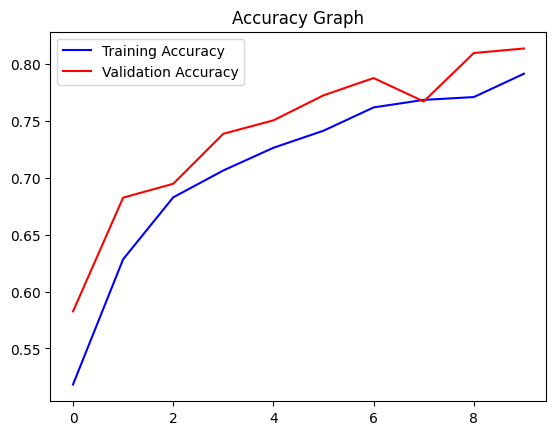

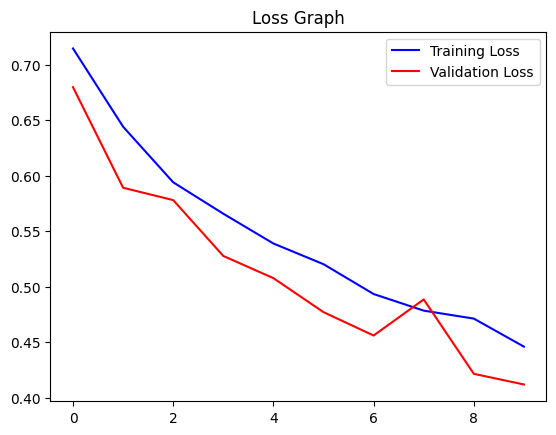

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()

In [34]:
image_path = "/content/test.jpg" # path of the image
img = load_img(image_path, target_size=(128, 128))
img = np.array(img)
img = img / 255.0 # normalize the image
img = img.reshape(1, 128, 128, 3) # reshape for prediction
pred = model.predict(img)
if pred[0] > 0.5:
    label = 'Dog'
else:
    label = 'Cat'
print(label)

1/1 [==============================] - 0s 57ms/step
Cat
